In [142]:
pip install category_encoders

In [143]:
# импорты для работы с данными, для визуализации, для моделей и т.д.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score
from category_encoders import TargetEncoder
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import ConfusionMatrixDisplay

In [144]:
# загружаем данные для регрессии

# реальная практическая задача - оценка стоимости драгоценности на основе её характеристик при торговле
csv_path = "diamonds.csv"

df_reg = pd.read_csv(csv_path)
# берем случайную выборку 60% для ускорения работы программы
df_reg = df_reg.sample(frac=0.6, random_state=42)

In [145]:
# анализируем входные данные
df_reg.head()
df_reg.shape
df_reg.info()
# df_reg.describe()
df_reg.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 33553 to 35687
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    30000 non-null  float64
 1   cut      30000 non-null  object 
 2   color    30000 non-null  object 
 3   clarity  30000 non-null  object 
 4   depth    30000 non-null  float64
 5   table    30000 non-null  float64
 6   price    30000 non-null  int64  
 7   x        30000 non-null  float64
 8   y        30000 non-null  float64
 9   z        30000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.5+ MB


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [146]:
# загружаем данные для классификации

# реальная практическая задача - анализ и прогнозирование бессонницы
csv_path = "Insomniac_data.csv"

df_clf = pd.read_csv(csv_path)

In [147]:
# анализируем входные данные
df_clf.head()
df_clf.shape
df_clf.info()
df_clf.describe()
df_clf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              345 non-null    object 
 1   Total_sleep_time(hour)            420 non-null    float64
 2   Satisfaction_of_sleep             420 non-null    object 
 3   Late_night_sleep                  420 non-null    object 
 4   Wakeup_frequently_during_sleep    420 non-null    object 
 5   Sleep_at_daytime                  420 non-null    object 
 6   Drowsiness_tiredness              420 non-null    object 
 7   Duration_of_this_problems(years)  420 non-null    float64
 8   Recent_psychological_attack       420 non-null    object 
 9   Afraid_of_getting_asleep          420 non-null    object 
 10  Disorder                          420 non-null    int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 36.2+ KB


,0
Name,75
Total_sleep_time(hour),0
Satisfaction_of_sleep,0
Late_night_sleep,0
Wakeup_frequently_during_sleep,0
Sleep_at_daytime,0
Drowsiness_tiredness,0
Duration_of_this_problems(years),0
Recent_psychological_attack,0
Afraid_of_getting_asleep,0


In [148]:
# подготавливаем данные

# делим признаки на числовые и категориальные
num_cols_reg = df_reg.drop(columns=["price"]).select_dtypes(include=["number"]).columns.tolist()
cat_cols_reg = df_reg.drop(columns=["price"]).select_dtypes(include=["object"]).columns.tolist()

num_cols_clf = df_clf.drop(columns=["Disorder"]).select_dtypes(include=["number"]).columns.tolist()
cat_cols_clf = df_clf.drop(columns=["Disorder"]).select_dtypes(include=["object"]).columns.tolist()

In [149]:
# определяем признаки и таргет
X_reg = df_reg.drop(columns=["price"])
y_reg = df_reg["price"]

X_clf = df_clf.drop(columns=["Disorder"])
y_clf = df_clf["Disorder"]

In [150]:
# определяем обучающие и тестовые выборки
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

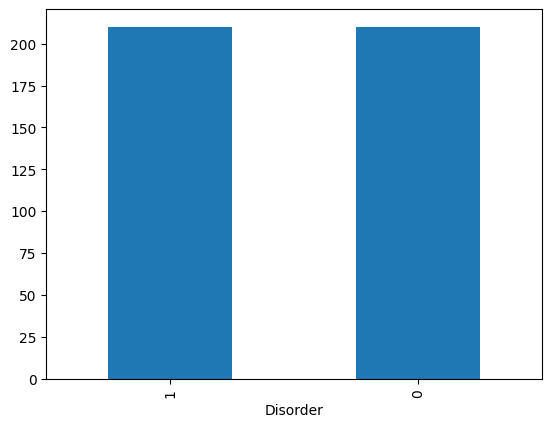

In [151]:
# смотрим изначальное распределение классов для классификации
df_clf["Disorder"].value_counts().plot(kind='bar')
plt.show()

In [152]:
# обычная классификация

# препроцессинг, стандартизируем числовые признаки, применяем OneHot
preprocessor_clf = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_clf),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_clf),
    ]
)

In [153]:
# создаем и обучаем модель
clf_baseline = Pipeline([
    ("prep", preprocessor_clf),
    ("model", KNeighborsClassifier())
])

clf_baseline.fit(Xc_train, yc_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Total_sleep_time(hour)',
                                                   'Duration_of_this_problems(years)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Name',
                                                   'Satisfaction_of_sleep',
                                                   'Late_night_sleep',
                                                   'Wakeup_frequently_during_sleep',
                                                   'Sleep_at_daytime',
                                                   'Drowsiness_tiredness',
                                                   'Recent_psychological_attack',
                                                   'Afraid_of_getting_asleep'])])),
                ('model', KNeighborsClassifier())])

In [154]:
# результаты обучения

yc_pred = clf_baseline.predict(Xc_test)

acc = accuracy_score(yc_test, yc_pred)
f1 = f1_score(yc_test, yc_pred)

print(acc, f1)

0.9523809523809523 0.9574468085106383


In [155]:
# обычная регрессия

# препроцессинг, стандартизируем числовые признаки, применяем OneHot
preprocessor_reg = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_reg),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_reg),
    ]
)

In [156]:
# создаем и обучаем модель
reg_baseline = Pipeline([
    ("prep", preprocessor_reg),
    ("model", KNeighborsRegressor())
])

reg_baseline.fit(Xr_train, yr_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', KNeighborsRegressor())])

In [157]:
# результаты обучения
yr_pred = reg_baseline.predict(Xr_test)

mae = mean_absolute_error(yr_test, yr_pred)
rmse = np.sqrt(mean_squared_error(yr_test, yr_pred))
r2 = r2_score(yr_test, yr_pred)

print(mae, rmse, r2)

435.7582666666666 820.7299605676238 0.9570891843219034


In [158]:
# улучшенная классификация

# препроцессинг, используем TargetEncoder вместо OneHot
preprocessor_clf_imp = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_clf),
        ("cat", TargetEncoder(), cat_cols_clf),
    ]
)

In [159]:
# создаем и обучаем модель

clf_pipe = Pipeline([
    ("prep", preprocessor_clf_imp),
    ("model", KNeighborsClassifier())
])

# подбираем гиперпараметры через GridSearchCV
params = {
    "model__n_neighbors": [3, 5, 7],
    "model__weights": ["uniform", "distance"],
    "model__metric": ["euclidean", "manhattan"]
}

clf_grid = GridSearchCV(
    clf_pipe,
    params,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

clf_grid.fit(Xc_train, yc_train)

print("лучшие параметры:", clf_grid.best_params_)
best_clf = clf_grid.best_estimator_

лучшие параметры: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'distance'}


0.9761904761904762 0.9782608695652174


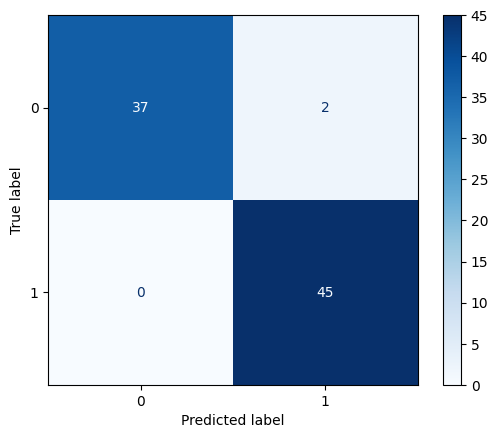

In [160]:
# результаты обучения

yc_pred_imp = best_clf.predict(Xc_test)

acc_imp = accuracy_score(yc_test, yc_pred_imp)
f1_imp = f1_score(yc_test, yc_pred_imp)

print(acc_imp, f1_imp)

ConfusionMatrixDisplay.from_predictions(
    yc_test,
    yc_pred_imp,
    cmap="Blues"
)

In [161]:
# улучшенная регрессия

# препроцессинг, используем TargetEncoder вместо OneHot
preprocessor_reg_imp = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_reg),
        ("cat", TargetEncoder(), cat_cols_reg),
    ]
)


In [162]:
# создаем и обучаем модель
reg_pipe = Pipeline([
    ("prep", preprocessor_reg_imp),
    ("model", KNeighborsRegressor())
])

# подбираем гиперпараметры через GridSearchCV
reg_grid = GridSearchCV(
    reg_pipe,
    params,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

reg_grid.fit(Xr_train, yr_train)

print("лучшие параметры:", reg_grid.best_params_)
best_reg = reg_grid.best_estimator_

лучшие параметры: {'model__metric': 'manhattan', 'model__n_neighbors': 3, 'model__weights': 'distance'}


392.6925350257976 815.8711703048348 0.9575957516715741


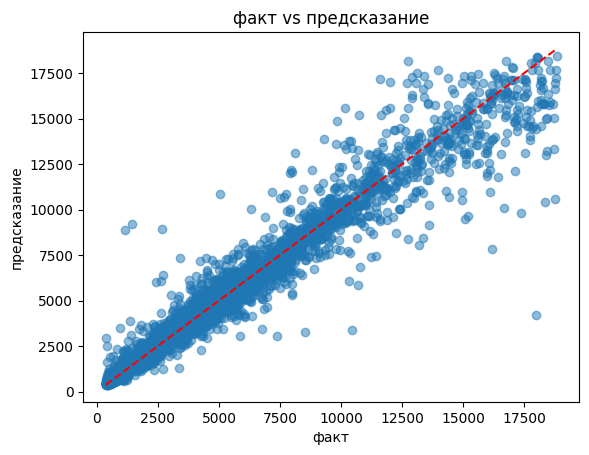

In [171]:
# результаты обучения
yr_pred_imp = best_reg.predict(Xr_test)

mae_imp = mean_absolute_error(yr_test, yr_pred_imp)
rmse_imp = np.sqrt(mean_squared_error(yr_test, yr_pred_imp))
r2_imp = r2_score(yr_test, yr_pred_imp)

print(mae_imp, rmse_imp, r2_imp)

plt.scatter(yr_test, yr_pred_imp, alpha=0.5)
plt.plot([yr_test.min(), yr_test.max()],
         [yr_test.min(), yr_test.max()],
         linestyle="--", color="red")
plt.xlabel("факт")
plt.ylabel("предсказание")
plt.title("факт vs предсказание")
plt.show()

In [164]:
# своя классификация

class MyKNNСlf:
    def __init__(self, n_neighbors=3):
        self.k = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X = np.array(X)
        predictions = []

        for x in X:
            distances = np.array([np.sum(np.abs(x - train_x)) for train_x in self.X_train])
            k_idx = distances.argsort()[:self.k]
            k_labels = self.y_train[k_idx]
            most_common = Counter(k_labels).most_common(1)[0][0]
            predictions.append(most_common)

        return np.array(predictions)

In [165]:
# создаем и обучаем модель с улучшенным препроцессором
my_clf_pipe = Pipeline([
    ("prep", preprocessor_clf_imp),
    ("model", MyKNNСlf(n_neighbors=5))
])

my_clf_pipe.fit(Xc_train, yc_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Total_sleep_time(hour)',
                                                   'Duration_of_this_problems(years)']),
                                                 ('cat', TargetEncoder(),
                                                  ['Name',
                                                   'Satisfaction_of_sleep',
                                                   'Late_night_sleep',
                                                   'Wakeup_frequently_during_sleep',
                                                   'Sleep_at_daytime',
                                                   'Drowsiness_tiredness',
                                                   'Recent_psychological_attack',
                                                   'Afraid_of_getting_asleep'])])),
                ('model', <__main__.MyKNNСlf object at 0x78bdcf584050>)])

In [166]:
# результаты обучения
yc_pred_my = my_clf_pipe.predict(Xc_test)

acc_my = accuracy_score(yc_test, yc_pred_my)
f1_my = f1_score(yc_test, yc_pred_my)

print(acc_my, f1_my)

0.9642857142857143 0.967741935483871


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [167]:
# своя регрессия

class MyKNNReg:
    def __init__(self, n_neighbors=3):
        self.k = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X):
        X = np.array(X)
        preds = []

        for x in X:
          distances = np.sum(np.abs(self.X_train - x), axis=1)
          k_idx = np.argpartition(distances, self.k)[:self.k]
          preds.append(np.mean(self.y_train[k_idx]))

        return np.array(preds)


In [168]:
# создаем и обучаем модель с улучшенным препроцессором
my_reg_pipe = Pipeline([
    ("prep", preprocessor_reg_imp),
    ("model", MyKNNReg(n_neighbors=3))
])

my_reg_pipe.fit(Xr_train, yr_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat', TargetEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', <__main__.MyKNNReg object at 0x78bdb774ffb0>)])

In [169]:
# результаты обучения
yr_pred_my = my_reg_pipe.predict(Xr_test)

mae_my = mean_absolute_error(yr_test, yr_pred_my)
rmse_my = np.sqrt(mean_squared_error(yr_test, yr_pred_my))
r2_my = r2_score(yr_test, yr_pred_my)

print(mae_my, rmse_my, r2_my)

410.2013333333333 842.8391315688325 0.9547461454351783


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [170]:
# сравнение всех реализаций между собой

print("\nклассификация\n")
print("модель\t\t\tAccuracy\tF1-score")
print(f"SKL бейзлайн\t\t{acc:.4f}\t\t{f1:.4f}")
print(f"SKL улучшенная\t\t{acc_imp:.4f}\t\t{f1_imp:.4f}")
print(f"MyKNN\t\t\t{acc_my:.4f}\t\t{f1_my:.4f}")

print("\nрегрессия\n")
print("модель\t\t\tMAE\t\tRMSE\t\tR²")
print(f"SKL бейзлайн\t\t{mae:.2f}\t\t{rmse:.2f}\t\t{r2:.4f}")
print(f"SKL улучшенная\t\t{mae_imp:.2f}\t\t{rmse_imp:.2f}\t\t{r2_imp:.4f}")
print(f"MyKNN\t\t\t{mae_my:.2f}\t\t{rmse_my:.2f}\t\t{r2_my:.4f}")

# по итогам замеров - лучше всего себя показывает улучшенный бейзлайн



классификация

модель			Accuracy	F1-score
SKL бейзлайн		0.9524		0.9574
SKL улучшенная		0.9762		0.9783
MyKNN			0.9643		0.9677

регрессия

модель			MAE		RMSE		R²
SKL бейзлайн		435.76		820.73		0.9571
SKL улучшенная		392.69		815.87		0.9576
MyKNN			410.20		842.84		0.9547
